In [0]:
import sklearn
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.utils import shuffle
#https://archive.ics.uci.edu/ml/datasets.php get data from here as zip file, there is a csv file in it

from google.colab import files
myuploadedfile=files.upload() #take csv file from your computer

Saving student-mat.csv to student-mat (2).csv


In [0]:
import io
my_data=pd.read_csv(io.StringIO(myuploadedfile['student-mat.csv'].decode('utf-8')),sep=';') #you get your data but cannot read so you need to convert then read it with this code line
print(my_data.head()) #your data's first 5 rows with all headings

  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]


In [0]:
my_data=my_data[["G1","G2","G3","studytime","failures","absences"]] #I just need these variables. So squizee the data
print(my_data.head())
#UPLOADING CSV FILE ENDS HERE------------------------------------------------------------------------------------------------------------------


   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


In [0]:
#SIMPLE NN STARTS FROM HERE--------------------------------------------------------------------------------------------------------------------
predict_variable="G3" #I want to predict this. Y value
x=np.array(my_data.drop([predict_variable],1)) #My X values are everything except my predict values so delete this predict values
y=np.array(my_data[predict_variable])
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.1) #give your data to the nn alg. as input and test sets
#---video 2 ends---

print(x_train.shape)
print(y_train.shape)

(395, 5)
(395,)
(355, 5)
(355,)


In [0]:
linear=linear_model.LinearRegression()
linear.fit(x_train,y_train)
acc=linear.score(x_test,y_test)
print(acc)

0.83900835693489


In [0]:
print('Coefficient: \n',linear.coef_)
print('Intercept: \n',linear.intercept_)

pred=linear.predict(x_test)

falan=pd.DataFrame({'Actual':y_test, 'Predicted': pred})
falan

Coefficient: 
 [ 0.15216471  0.97517775 -0.20496316 -0.3713005   0.03760577]
Intercept: 
 -1.3815297586707729


,Actual,Predicted
0,12,12.863996
1,13,11.856691
2,13,13.728929
3,11,12.034016
4,12,11.821847
5,10,8.377039
6,9,8.117834
7,11,10.759734
8,0,-1.720435
9,11,10.988852


In [0]:
from sklearn import metrics

print('Mean absolute error(MAE): ',metrics.mean_absolute_error(y_test,pred))
print('Mean squared error(MSE): ', metrics.mean_squared_error(y_test,pred))
print('Root mean squared error(RMSE): ',np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean absolute error(MAE):  1.0398315243991516
Mean squared error(MSE):  2.8398925836685414
Root mean squared error(RMSE):  1.6851980844009233


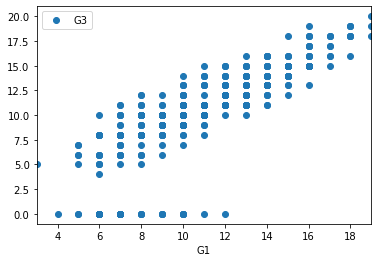

In [0]:
my_data.plot(x='G1',y='G3',style='o')

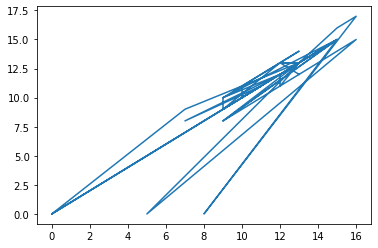

In [0]:
import matplotlib.pyplot as plt
plt.plot(x_test[:,1],y_test)

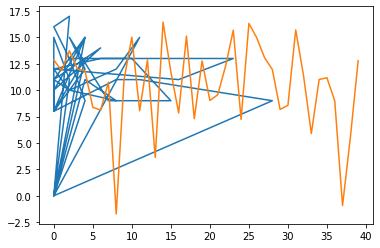

In [0]:
plt.plot(x_test[:,4],y_test,pred)